In [2]:
#importing pandas and reading in the dataset
import pandas as pd
df = pd.read_csv("disney_movies.csv")
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029


I'm curious- what are the top 10 highest grossing disney movies, both with and without inflation? Does inflation greatly affect the results?

In [3]:
#without inflation

df_top_10_gross = df.nlargest(10, "total_gross")
df_top_10_gross


,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
524,The Avengers,2012-05-04,Action,PG-13,623279547,660081224
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459005868
441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,544817142
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898
499,Toy Story 3,2010-06-18,Adventure,G,415004880,443408255
532,Iron Man 3,2013-05-03,Action,PG-13,408992272,424084233
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349


In [4]:
#with inflation
df_top_10_gross_inflation = df.nlargest(10, "inflation_adjusted_gross")
df_top_10_gross_inflation

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
179,The Lion King,1994-06-15,Adventure,G,422780140,761640898


What's the average gross of all Disney movies- both with and without inflation?

In [5]:
avg_gross = df["total_gross"].mean()
print("The average gross of all Disney movies is $" + str(avg_gross) + ".")
avg_gross_inflation = df["inflation_adjusted_gross"].mean()
print("The average gross of all Disney movies, adjusted for inflation, is $" + str(avg_gross_inflation) + ".")
difference_gross = avg_gross_inflation - avg_gross
print("The average inflation adjusted gross is $" + str(difference_gross) + " greater than the raw gross.")

The average gross of all Disney movies is $64701788.51986183.
The average gross of all Disney movies, adjusted for inflation, is $118762523.31088082.
The average inflation adjusted gross is $54060734.79101899 greater than the raw gross.


From now on, when doing analysis of how much money these movies made, I will use inflation adjusted gross to make sure my assertions are as accurate and fair as possible.

But how does the MPAA rating of the movie affect the amount of money it makes?

First, I'll create a separate DataFrame for each MPAA rating, for quick visual comparison and other future uses.

In [6]:
df_g = df[df["mpaa_rating"] == "G"]
df_g

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730
...,...,...,...,...,...,...
523,Chimpanzee,2012-04-20,Documentary,G,28965459,30675725
533,Monsters University,2013-06-21,Adventure,G,268488329,278395641
545,Bears,2014-04-18,Documentary,G,17780194,18346024
557,Monkey Kingdom,2015-04-17,Documentary,G,16432322,16432322


In [7]:
df_pg = df[df["mpaa_rating"] == "PG"]
df_pg

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
37,Splash,1984-03-09,Comedy,PG,62599495,157057661
60,3 Men and a Baby,1987-11-25,Comedy,PG,167780960,353334607
64,Return to Snowy River,1988-04-15,Adventure,PG,13687027,28073384
65,Big Business,1988-06-10,Comedy,PG,40150487,82352451
66,Who Framed Roger Rabbit?,1988-06-22,Comedy,PG,154112492,316250084
...,...,...,...,...,...,...
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561
572,The BFG,2016-07-01,Adventure,PG,55483770,55483770
573,Pete’s Dragon,2016-08-12,Adventure,PG,76233151,76233151
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389


In [8]:
df_pg13 = df[df["mpaa_rating"] == "PG-13"]
df_pg13

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
73,Beaches,1988-12-21,Drama,PG-13,57041866,120381757
74,Three Fugitives,1989-01-27,Comedy,PG-13,40590000,85757817
82,Gross Anatomy,1989-10-20,Drama,PG-13,11346186,23972012
85,Stella,1990-02-02,Drama,PG-13,20062347,40077147
90,Fire Birds,1990-05-24,Action,PG-13,14760451,29485923
...,...,...,...,...,...,...
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923


In [9]:
df_R = df[df["mpaa_rating"] == "R"]
df_R

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
45,Down and Out in Beverly Hills,1986-01-31,Comedy,R,62134225,141183693
47,Ruthless People,1986-06-27,Comedy,R,71624879,162748712
51,The Color of Money,1986-10-17,Drama,R,52293000,117957323
52,Outrageous Fortune,1987-01-30,Comedy,R,52864741,113976921
57,Stakeout,1987-08-05,Comedy,R,65673233,141592160
...,...,...,...,...,...,...
454,The Lookout,2007-03-30,Drama,R,4600585,5637048
455,The Hoax,2007-04-06,Drama,R,7164995,8779196
471,Miracle at St. Anna,2008-09-26,Drama,R,7916887,9295171
517,Fright Night,2011-08-19,Horror,R,18298649,19452402


In [10]:
df_nc17 = df[df["mpaa_rating"] == "NC-17"]
df_nc17

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross


In [11]:
df_not_rated = df[df["mpaa_rating"] == "Not Rated"]
df_not_rated

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
11,Bon Voyage!,1962-05-17,Comedy,Not Rated,9230769,109581646
13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
404,America's Heart and Soul,2004-07-02,Documentary,Not Rated,314000,426246


It's also worth noting that PG-13 wasn't a rating given to movies until 1984.

I want to create a graph that compares the average gross of each rating.

In [12]:
df_group_rating = df.groupby("mpaa_rating").agg("mean").reset_index()
df_group_rating

,mpaa_rating,total_gross,inflation_adjusted_gross
0,G,9.209061e+07,2.912610e+08
1,Not Rated,5.046259e+07,2.998734e+08
2,PG,7.362521e+07,1.015414e+08
3,PG-13,8.118074e+07,1.029486e+08
4,R,2.936536e+07,5.530581e+07


<AxesSubplot:>

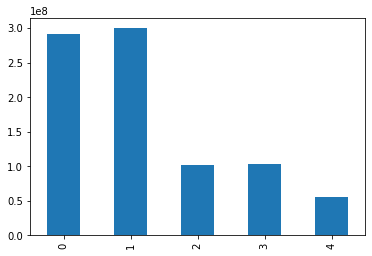

In [13]:
df_group_rating["inflation_adjusted_gross"].plot.bar()

So is it worth it for dinsey to keep making movies rated PG, PG-13, and R?
I'm going to run some simulations to find out.

The simulations will randomly select movies of each rating. However, I'm only going to use movies since July 1, 1984, since that's when the PG-13 rating was first used by the MPAA.

Let's see if I can convert the release date into an integer so I can use it in conditionals.

In [14]:
#using snow white because I'm only trying it on one movie first
df_snow_white = df[df["movie_title"] == "Snow White and the Seven Dwarfs"]
df_snow_white

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


In [15]:
#snow_white_release_date = df_snow_white["release_date"]
#int(df_snow_white["release_date"])
#snow_white_release_date
#print("The release date of Snow White is" + int(df_snow)

That didn't work, so I went to office hours to see if there's a function I don't know that could do this.
Apparently, there is!

In [16]:
#adding new columns to df that describe the release date of the movie in different ways
df["release_year"] = pd.DatetimeIndex(df["release_date"]).year
df["release_month"] = pd.DatetimeIndex(df["release_date"]).month
df["release_day"] = pd.DatetimeIndex(df["release_date"]).day
#This one erases the hyphens in the release date, transforming it into a long number that describes the date using
#the year, month, and day in a way that is still quantifiable.
df["release_number"] = df.apply(lambda row: row["release_date"].replace("-", ""), axis = 1)
df = df.astype({"release_number": int})
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year,release_month,release_day,release_number
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,12,21,19371221
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,2,9,19400209
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,11,13,19401113
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,11,12,19461112
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,2,15,19500215
...,...,...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016,9,2,20160902
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016,9,23,20160923
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016,11,4,20161104
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016,11,23,20161123


Now that I can use release date information as integers, I'm gonna make some cool charts with it- just for fun.

In [17]:
#Counts the number of movies released in each year
#year_counts = df["release_year"].value_counts()
#df_year_counts = pd.DataFrame(year_counts)
#df_year_counts["year"] = df_year_counts.index
#df_year_counts.sort_values("year").
#df_year_counts.rename(columns = {"release_year": "count"})
#Okay, none of that worked super well. So I'm gonna try to do it by grouping instead.

df_group_year = df.groupby("release_year").agg("count")
df_group_year

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_month,release_day,release_number
release_year,,,,,,,,,
1937,1,1,1,1,1,1,1,1,1
1940,2,2,2,2,2,2,2,2,2
1946,1,1,1,1,1,1,1,1,1
1950,1,1,1,1,1,1,1,1,1
1954,1,1,1,0,1,1,1,1,1
1955,1,1,1,1,1,1,1,1,1
1959,1,1,1,0,1,1,1,1,1
1961,3,3,3,2,3,3,3,3,3
1962,1,1,1,1,1,1,1,1,1


In [18]:
#10 years with the highest amount of movies released
df_group_year.nlargest(10, "movie_title")

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_month,release_day,release_number
release_year,,,,,,,,,
1995,32,32,32,32,32,32,32,32,32
1994,30,30,29,28,30,30,30,30,30
1996,28,28,27,28,28,28,28,28,28
1993,27,27,24,27,27,27,27,27,27
1997,23,23,23,23,23,23,23,23,23
1992,22,22,19,22,22,22,22,22,22
1998,22,22,22,22,22,22,22,22,22
2002,22,22,21,21,22,22,22,22,22
1999,21,21,20,21,21,21,21,21,21


<AxesSubplot:xlabel='release_year'>

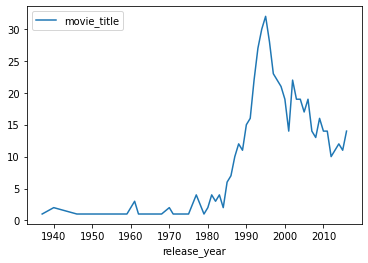

In [19]:
#I'm going to make a line graph with release_year as the x axis and movie_title as the y axis because
#every movie in this data set has a title, so the count will be accurate. Some other columns are missing
#data for certain movies.
df_group_year.plot.line(y = "movie_title")

In [20]:
df_group_month = df.groupby("release_month").agg("count")
df_group_month

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year,release_day,release_number
release_month,,,,,,,,,
1,38,38,35,34,38,38,38,38,38
2,44,44,43,38,44,44,44,44,44
3,61,61,60,54,61,61,61,61,61
4,50,50,47,46,50,50,50,50,50
5,41,41,40,39,41,41,41,41,41
6,50,50,48,45,50,50,50,50,50
7,44,44,44,36,44,44,44,44,44
8,49,49,46,43,49,49,49,49,49
9,43,43,43,40,43,43,43,43,43


<AxesSubplot:xlabel='release_month'>

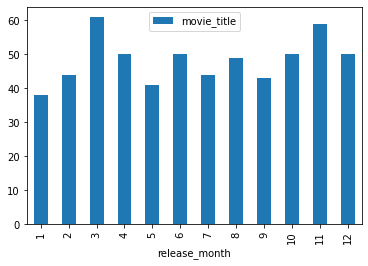

In [21]:
df_group_month.plot.bar(y = "movie_title")

In [22]:
#Selecting movies since July 1, 1984
df_current = df[df["release_number"] >= 19840701]
df_current

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year,release_month,release_day,release_number
38,Country,1984-09-29,Drama,NaN,8400000,21075000,1984,9,29,19840929
39,Baby: Secret of the Lost Legend,1985-03-22,Adventure,NaN,14276095,33900697,1985,3,22,19850322
40,Return to Oz,1985-06-21,Adventure,NaN,10618813,25215934,1985,6,21,19850621
41,The Black Cauldron,1985-07-24,Adventure,NaN,21288692,50553142,1985,7,24,19850724
42,My Science Project,1985-08-09,Comedy,NaN,4100000,9736051,1985,8,9,19850809
...,...,...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016,9,2,20160902
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016,9,23,20160923
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016,11,4,20161104
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2016,11,23,20161123


Now that I've selected movies released since PG-13 first became a rating, I need to narrow it down to movies since then that are also rated either PG-13 or R. After that, I'll run a simulation 10,000 times that takes the average inflation adjusted gross of a random sample of 100 PG-13 or R rated movies. 

Hopefully, this will follow a relatively normal distribution. I'll represent it in a histogram.

I want to see if it's financially worth it for Disney to keep making G rated movies. 
I'll use z scores and cdf functions to see the percentage likeliness of a movie from the more "adult" ratings to make more than a G or PG movies would make, on average. 

In [23]:
#Selecting movies since July 1, 1984 that are rated either G or PG

df_current_kids = df_current[(df_current.mpaa_rating == "G")|(df_current.mpaa_rating == "PG")]
df_current_kids

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year,release_month,release_day,release_number
60,3 Men and a Baby,1987-11-25,Comedy,PG,167780960,353334607,1987,11,25,19871125
64,Return to Snowy River,1988-04-15,Adventure,PG,13687027,28073384,1988,4,15,19880415
65,Big Business,1988-06-10,Comedy,PG,40150487,82352451,1988,6,10,19880610
66,Who Framed Roger Rabbit?,1988-06-22,Comedy,PG,154112492,316250084,1988,6,22,19880622
71,Ernest Saves Christmas,1988-11-11,Comedy,PG,28202109,57845202,1988,11,11,19881111
...,...,...,...,...,...,...,...,...,...,...
571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561,2016,6,17,20160617
572,The BFG,2016-07-01,Adventure,PG,55483770,55483770,2016,7,1,20160701
573,Pete’s Dragon,2016-08-12,Adventure,PG,76233151,76233151,2016,8,12,20160812
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2016,9,23,20160923


In [24]:
#Selecting movies since July 1, 1984 that are rated either PG-13 or R

df_current_adult = df_current[(df_current.mpaa_rating == "PG-13")|(df_current.mpaa_rating == "R")]
df_current_adult




,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,release_year,release_month,release_day,release_number
45,Down and Out in Beverly Hills,1986-01-31,Comedy,R,62134225,141183693,1986,1,31,19860131
47,Ruthless People,1986-06-27,Comedy,R,71624879,162748712,1986,6,27,19860627
51,The Color of Money,1986-10-17,Drama,R,52293000,117957323,1986,10,17,19861017
52,Outrageous Fortune,1987-01-30,Comedy,R,52864741,113976921,1987,1,30,19870130
57,Stakeout,1987-08-05,Comedy,R,65673233,141592160,1987,8,5,19870805
...,...,...,...,...,...,...,...,...,...,...
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015,12,18,20151218
569,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349,2016,5,6,20160506
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2016,9,2,20160902
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2016,11,4,20161104


In [41]:
#Simulation of avg inflation adjusted gross for PG-13 and R rated movies

data = []
for i in range(10000):
    df_sample = df_current_adult.sample(100)
    mean = df_sample["inflation_adjusted_gross"].mean()
    
    #mean = simulate_average(df_current_adult, "inflation_adjusted_gross", 100)
    d = {"mean inflation adjusted gross": mean}
    data.append(d)
df_simulation_10000 = pd.DataFrame(data)
df_simulation_10000

,mean inflation adjusted gross
0,82427193.36
1,85770845.74
2,69908366.42
3,81070634.59
4,91921579.12
...,...
9995,77892063.98
9996,98249110.65
9997,88651988.11
9998,88022984.44


array([[<AxesSubplot:title={'center':'mean inflation adjusted gross'}>]],
      dtype=object)

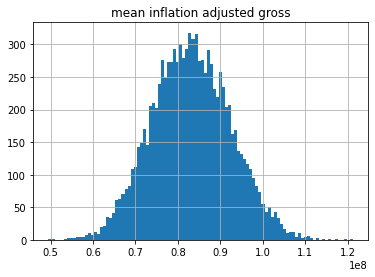

In [42]:
df_simulation_10000.hist(bins = 100)

Now that we know this follows normal distribution, I can use z scores to find the information I want.

In [44]:
#Finding z-score zero (mean)

z_0 = df_simulation_10000["mean inflation adjusted gross"].mean()

print(z_0)

83144173.494667


In [45]:
#finding standard error of data 

#sd = df_simulation_10000["mean"].std()
#sd
#se = sd / (100 ** 0.5)
#se
sd = df_current_adult["inflation_adjusted_gross"].std()
sd
se = sd / (100 ** 0.5)
se

11956892.696677737

In [46]:
#average inflation adjusted gross of kids rated movies since 1984

avg_kids_gross = df_current_kids["inflation_adjusted_gross"].mean()
avg_kids_gross

111396708.79467681

In [50]:
#calculating z-score

z_score = (avg_kids_gross - z_0) / se
z_score

2.3628660068062564

In [48]:
#How likely is it for a PG-13 or R rated movie to gross more than G and PG rated movies made on average sinec July 1, 1984?
from scipy.stats import norm
decimal_probability = 1 - norm.cdf(z_score)
decimal_probability 

0.009067112442822545

In [49]:
#convert to percent

percent_probability = decimal_probability * 100
percent_probability

0.9067112442822545